In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

JUMP_STEP = 10  # Determines the speed of exec. 
                # Big jump step will mean we test smaller set of 
                # feature sizes. 

X_train = np.loadtxt("Dataset/train/X_train.txt")
y_train = np.loadtxt("Dataset/train/y_train.txt")

X_test = np.loadtxt("Dataset/test/X_test.txt")
y_test = np.loadtxt("Dataset/test/y_test.txt")

p = X_train.shape[1]
N = X_train.shape[0]

def evaluate_for_every_num_feature(classifier, Xtr, ytr, Xtst, ytst):
    n_features_to_test = np.arange(1,p+1, JUMP_STEP)
    
    # Create a random permutation of the features to test
    #random_indexes = np.random.permutation(p)
    random_indexes = np.arange(1, p) # Not so random... 
                                     # Did not work when comparing to reduced rank LDA. 
                                     # Instead, Xtr should already be shuffled. 
    
    # Create a result vector 
    acc_results = np.array([])
    
    # Test classifier for every amount of features. 
    # Get accuracy and store it in results
    for n_features in n_features_to_test:
        # Take n_features among the random features
        features = random_indexes[0:n_features]
        
        # Create train set based on the randomly selected n_features
        X = Xtr[:, features]
        
        # Train
        classifier.fit(X, ytr)
        
        # Measure performance 
        y_pred = classifier.predict(Xtst[:, features])
        result = accuracy_score(ytst, y_pred)
        
        # Store the result
        acc_results = np.append(acc_results, result)
        
    return n_features_to_test, acc_results


[0.20427553 0.58873431 0.69935528 0.71191042 0.84458772 0.85273159
 0.85782151 0.891415   0.8937903  0.89684425 0.90023753 0.90023753
 0.89786223 0.90057686 0.90668476 0.92738378 0.93281303 0.93926026
 0.94163556 0.95147608 0.96029861 0.75704106 0.44960977 0.76484561
 0.18221921 0.16661011 0.18221921 0.18221921 0.18221921 0.18221921
 0.18221921 0.18221921 0.18221921 0.16661011 0.18221921 0.16661011
 0.16661011 0.16661011 0.16661011 0.16661011 0.16661011 0.18221921
 0.16661011 0.34204276 0.16661011 0.16661011 0.16661011 0.16661011
 0.16661011 0.16661011 0.33491686 0.14251781 0.16830675 0.16830675
 0.16830675 0.33355955 0.16830675]
[0.20427553 0.56464201 0.61723787 0.63284696 0.80420767 0.82592467
 0.83101459 0.85951815 0.86053614 0.86868001 0.87139464 0.87512725
 0.87207329 0.87852053 0.88225314 0.89412962 0.89480828 0.90057686
 0.90193417 0.91279267 0.91957923 0.91957923 0.92025789 0.92059722
 0.91957923 0.92127587 0.92229386 0.9239905  0.92602647 0.92772311
 0.92874109 0.92806244 0.92

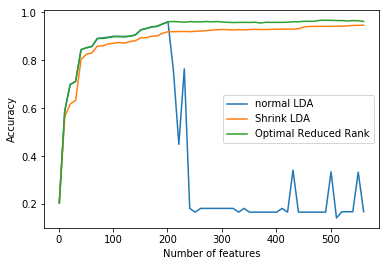

In [3]:
normal_lda = LinearDiscriminantAnalysis(solver='lsqr')
shrink_lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5)
optimal_reduced_rank_lda = LinearDiscriminantAnalysis(solver='svd', n_components=100)

classifiers = [normal_lda, shrink_lda, optimal_reduced_rank_lda]
classifier_labels = ["normal LDA", "Shrink LDA", "Optimal Reduced Rank"]

def reduced_rank_lda_n_components(n):
    return LinearDiscriminantAnalysis(solver='svd', n_components=n)

#n = np.array([1,2,3,4,5,6,7,8,9,10,20,50,100]) # Number of components
n = np.array([])
components_reduced_rank_lda = [reduced_rank_lda_n_components(i) for i in n]
components_labels = [str(i) + " components" for i in n]

# Add our component classifiers
classifiers.extend(components_reduced_rank_lda)
classifier_labels.extend(components_labels)

#random_indexes = np.random.permutation(p)
random_indexes = np.arange(0,p)
X_train_shuffled = X_train[:, random_indexes]
X_test_shuffled = X_test[:, random_indexes]

def eval_and_plot(classifier):
    n_features, results = evaluate_for_every_num_feature(classifier, X_train_shuffled, y_train, X_test_shuffled, y_test)
    print(results)
    plot, = plt.plot(n_features, results)
    return plot

# Plot with legends
plots = [eval_and_plot(classifier) for classifier in classifiers]
plt.legend(plots, classifier_labels);
plt.xlabel('Number of features');
plt.ylabel('Accuracy');

<IPython.core.display.Javascript object>


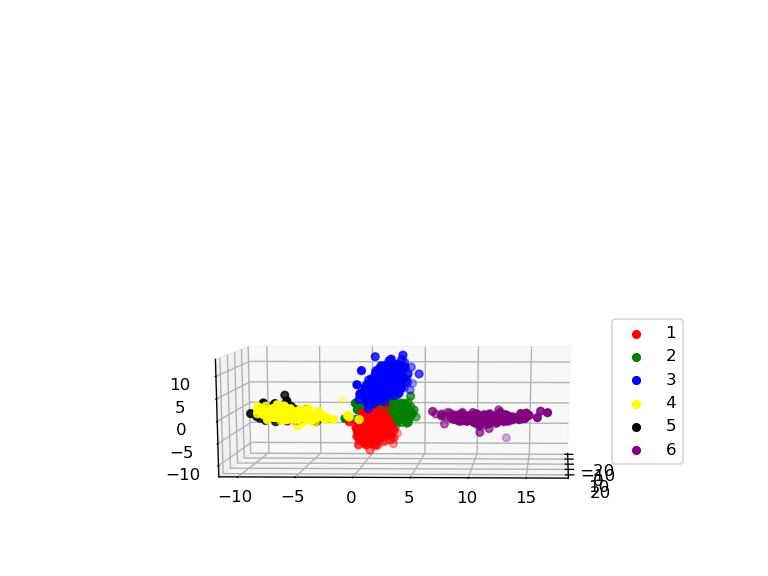

In [4]:
from mpl_toolkits.mplot3d import axes3d    

%matplotlib notebook

X_transformed = LinearDiscriminantAnalysis().fit(X_train, y_train).transform(X_test)

fig = plt.figure()
ax = fig.add_subplot(212, projection='3d')

colors = ['red', 'green', 'blue', 'yellow', 'black', 'purple']


for classnumber in range(1, 7):
    filterindex = np.where(y_test == classnumber)

    X_filtered = X_transformed[filterindex,:]
    X_filtered = X_filtered[0]
    y_filtered = y_test[filterindex]
    
    ax.scatter(X_filtered[:,0], X_filtered[:,1], X_filtered[:,2], label=str(classnumber), c=colors[classnumber-1])
ax.legend()


<IPython.core.display.Javascript object>


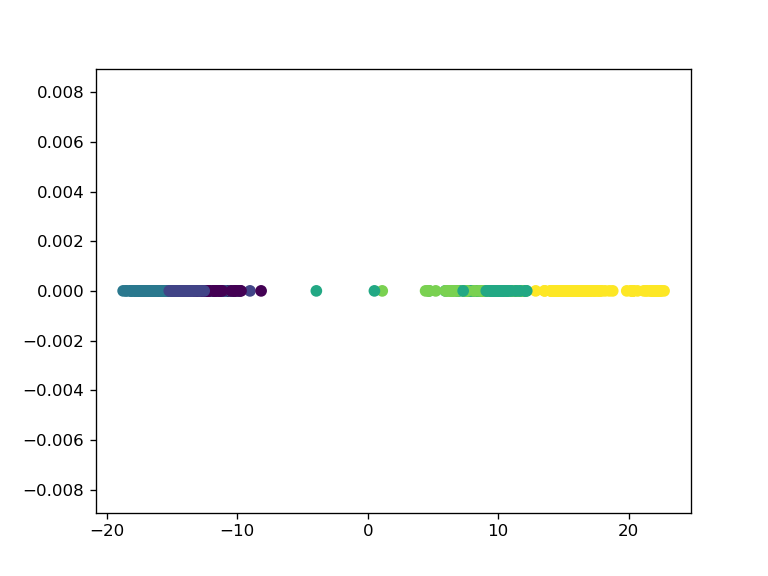

In [4]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.scatter(X_transformed[:,0], np.zeros([len(y_test),1]), label=y_test, c=y_test)